In [29]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from ipywidgets import interact


dimx=1500
dimy=1000
angL =int( math.atan(dimy/dimx)*180/np.pi)


# La escala espacial en cada eje es 1/cos(newAngle)
def escalar(angL):
    global scale
    scale=np.empty([360])
    torad=np.pi/180;
    for i in range(180):
        if(i<=angL):
            scale[i+180]=scale[i]=1/math.cos(i*torad);
        if(i>angL and i<=90):
            scale[i+180]=scale[i]=1/math.cos((90-i)*torad);
        if(i>90 and i<=180-angL):
            scale[i+180]=scale[i]=1/math.cos((i-90)*torad);
        if(i>=180-angL):
            scale[i+180]=scale[i]=1/math.cos((180-i)*torad);


escalar(angL)

rho_16 = np.arange(16)
rho_32 = np.arange(32)
rho_64 = np.arange(64)
rho_128 = np.arange(128)
rho_1k = np.arange(1000)

theta = np.linspace(0,2*np.pi,360)

A16, R16 = np.meshgrid(theta, rho_16)
A32, R32 = np.meshgrid(theta, rho_32)
A64, R64 = np.meshgrid(theta, rho_64)
A128, R128 = np.meshgrid(theta, rho_128)
A1k, R1k = np.meshgrid(theta, rho_1k)



# Función para crear el gráfico. No usada
def create_polar_plot(data):
    plt.pcolormesh(data, cmap='jet')
    plt.colorbar()
    plt.show()
    


In [30]:
dir="d:/output/"
rad1=np.transpose(np.loadtxt(dir+"punto1o.txt"))
rad2=np.transpose(np.loadtxt(dir+"punto2o.txt"))
rad3=np.transpose(np.loadtxt(dir+"punto3o.txt"))
img1=np.transpose(np.loadtxt(dir+"punto1i.txt"))
img2=np.transpose(np.loadtxt(dir+"punto2i.txt"))
img3=np.transpose(np.loadtxt(dir+"punto3i.txt"))
fft1=np.transpose(np.loadtxt(dir+"punto1l.txt"))
fft2=np.transpose(np.loadtxt(dir+"punto2l.txt"))
fft3=np.transpose(np.loadtxt(dir+"punto3l.txt"))
cep1=np.transpose(np.loadtxt(dir+"punto1c.txt"))
cep2=np.transpose(np.loadtxt(dir+"punto2c.txt"))
cep3=np.transpose(np.loadtxt(dir+"punto3c.txt"))

# Descartamos los valores positivos de Cepstrum. Ya implementado en código
if False:
    cep1 = np.where(cep1>0, 0, -cep1)
    cep2 = np.where(cep2>0, 0, -cep2)
    cep3 = np.where(cep3>0, 0, -cep3)

# Descartamos los valores centrales de Cepstrum?
x=1
if False:
    cep1[0:x,:]=0
    cep2[0:x,:]=0
    cep3[0:x,:]=0


In [31]:
# tam Determina el tamaño de la imagen resultante
tam=1000

wins=64
wins2=int(wins/2)
wins4=int(wins/4)

nimg1=np.zeros([tam,360])
nimg2=np.zeros([tam,360])
nimg3=np.zeros([tam,360])
ncep1=np.zeros([tam,360])
ncep2=np.zeros([tam,360])
ncep3=np.zeros([tam,360])
nfft1=np.zeros([tam,360])
nfft2=np.zeros([tam,360])
nfft3=np.zeros([tam,360])
interpI=np.linspace(0, 1, num=wins2)
interpL=np.linspace(0, 1, num=wins2)
interpC=np.linspace(0, 1, num=wins2)

for i in range(360):
    vals=int((tam/2)*scale[i])
    val=int(tam/2)
    interps=np.linspace(0, 1, num=vals)
    interp=np.linspace(0, 1, num=val)
    # Si tam2 es 500, interp genera vectores de 0 a 1 con entre 500 y 900 puntos
    resultI1=np.interp(interps,interpI,img1[:,i])
    resultI2=np.interp(interps,interpI,img2[:,i])
    resultI3=np.interp(interps,interpI,img3[:,i])
    resultL1=np.interp(interp,interpL,fft1[:,i])
    resultL2=np.interp(interp,interpL,fft2[:,i])
    resultL3=np.interp(interp,interpL,fft3[:,i])
    resultC1=np.interp(interps,interpC,cep1[:,i])
    resultC2=np.interp(interps,interpC,cep2[:,i])
    resultC3=np.interp(interps,interpC,cep3[:,i])
    
    array_destino = np.zeros(tam)
    array_destino[:vals] = resultI1[:vals]
    nimg1[:,i]=array_destino

    array_destino = np.zeros(tam)
    array_destino[:vals] = resultI2[:vals]
    nimg2[:,i]=array_destino

    array_destino = np.zeros(tam)
    array_destino[:vals] = resultI3[:vals]
    nimg3[:,i]=array_destino

    array_destino = np.zeros(tam)
    array_destino[:val] = resultL1[:val]
    nfft1[:,i]=array_destino

    array_destino = np.zeros(tam)
    array_destino[:val] = resultL2[:val]
    nfft2[:,i]=array_destino

    array_destino = np.zeros(tam)
    array_destino[:val] = resultL3[:val]
    nfft3[:,i]=array_destino

    
    array_destino = np.zeros(tam)
    array_destino[:vals] = resultC1[:vals]
    ncep1[:,i]=array_destino

    array_destino = np.zeros(tam)
    array_destino[:vals] = resultC2[:vals]
    ncep2[:,i]=array_destino

    array_destino = np.zeros(tam)
    array_destino[:vals] = resultC3[:vals]
    ncep3[:,i]=array_destino



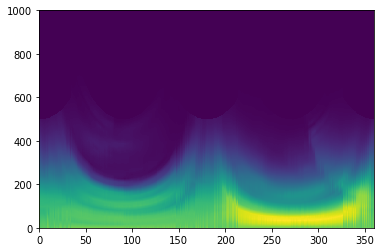

In [32]:
val=int((tam/2)*scale[13])
interp=np.linspace(0, 1, num=val)
resultI1=np.interp(interp,interpI,img1[:,23])
plt.pcolormesh(nimg1)

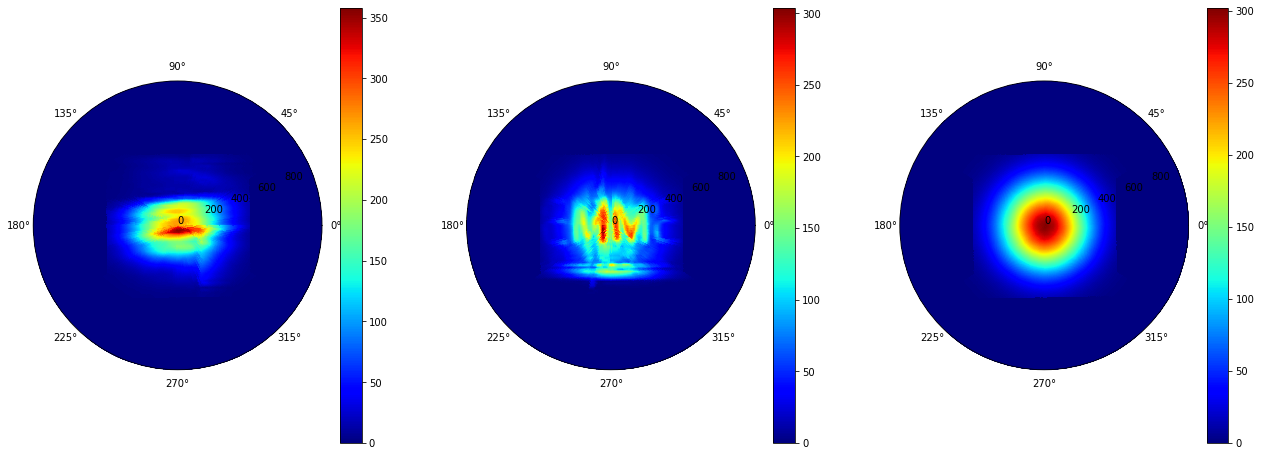

In [33]:
fig,ax = plt.subplots(1,3,figsize=(22,8),subplot_kw=dict(projection='polar'))
ax[0].grid(False);ax[1].grid(False);ax[2].grid(False);
im=ax[0].pcolormesh(A1k,R1k,nimg1, cmap='jet', edgecolors='face')
fig.colorbar(im,orientation='vertical',ax=ax[0])
im=ax[1].pcolormesh(A1k,R1k,nimg2, cmap='jet', edgecolors='face')
fig.colorbar(im,orientation='vertical',ax=ax[1])
im=ax[2].pcolormesh(A1k,R1k,nimg3, cmap='jet', edgecolors='face')
fig.colorbar(im,orientation='vertical',ax=ax[2])
#ax.set_theta_direction(-1)
# interact(create_polar_plot, data=img1)

In [26]:
cep1[:,i].shape

(32,)

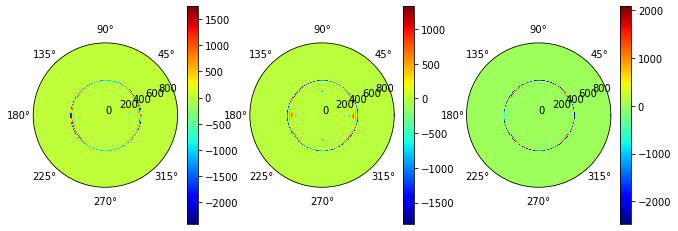

In [34]:

A=A1k
R=R1k

fig,ax = plt.subplots(1,3,figsize=(11,4),subplot_kw=dict(projection='polar'))
ax[0].grid(False);ax[1].grid(False);ax[2].grid(False);
im=ax[0].pcolormesh(A,R,nfft1, cmap='jet', edgecolors='face')
fig.colorbar(im,orientation='vertical',ax=ax[0])
im=ax[1].pcolormesh(A,R,nfft2, cmap='jet', edgecolors='face')
fig.colorbar(im,orientation='vertical',ax=ax[1])
im=ax[2].pcolormesh(A,R,nfft3, cmap='jet', edgecolors='face')
fig.colorbar(im,orientation='vertical',ax=ax[2])
#ax.set_theta_direction(-1)
#interact(im, data=cep2)

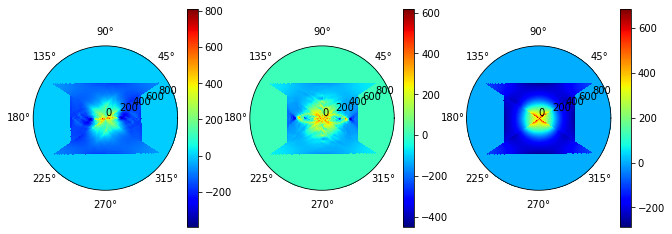

In [35]:
if wins == 64:
    A=A16
    R=R16
A=A1k
R=R1k
fig,ax = plt.subplots(1,3,figsize=(11,4),subplot_kw=dict(projection='polar'))
ax[0].grid(False);ax[1].grid(False);ax[2].grid(False);
im=ax[0].pcolormesh(A,R,ncep1, cmap='jet', edgecolors='face')
fig.colorbar(im,orientation='vertical',ax=ax[0])
im=ax[1].pcolormesh(A,R,ncep2, cmap='jet', edgecolors='face')
fig.colorbar(im,orientation='vertical',ax=ax[1])
im=ax[2].pcolormesh(A,R,ncep3, cmap='jet', edgecolors='face')
fig.colorbar(im,orientation='vertical',ax=ax[2])
#ax.set_theta_direction(-1)
#interact(im, data=cep2)